# **PROJECT - 1 : NETFLIX DATA ANALYSIS**
Author : Amaan Haque

Domain of Internship : Data Analyst

Company : Unified Mentor

# **IMPORTING ALL THE ESSENTIAL LIBRARIES**

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#**READING THE DATASET**

In [163]:
# Loading the dataset
data = pd.read_csv('/content/drive/MyDrive/netflix1.csv')

data.head()


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [164]:
data.shape

(8790, 10)

In [165]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [166]:
data.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


# **DATA CLEANING**

In [167]:
# Checking for missing values
print(data.isnull().sum())

# Droping duplicates if any
data.drop_duplicates(inplace=True)

# Droping rows with missing critical information
data.dropna(subset=['director', 'country'], inplace=True)

# Converting 'date_added' to datetime
data['date_added'] = pd.to_datetime(data['date_added'])

# Show data types to confirm changes
print(data.dtypes)


show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64
show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object


# DATA ANALYSIS...

# **Distribution of Content by Type**



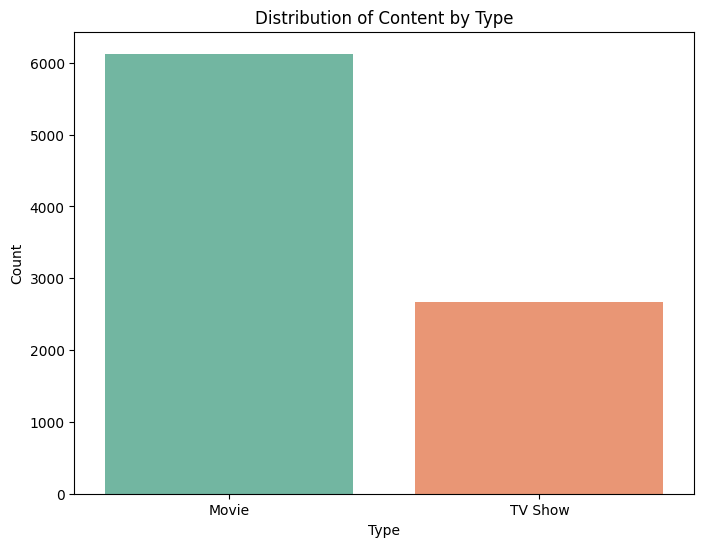

In [168]:
# Counting the number of Movies and TV Shows
type_counts = data['type'].value_counts()

# Plotting the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=type_counts.index, y=type_counts.values, hue=type_counts.index, palette='Set2', dodge=False)
plt.title('Distribution of Content by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


* Graph Type: Bar chart

* Analysis: Shows that Netflix has significantly more movies than TV shows.
* Summary: The majority of content available on Netflix is movies, with TV shows making up a smaller but substantial portion.

---




In [169]:
!pip install plotly
import plotly.express as px
import plotly.graph_objects as go

# Content Distribution in Percentage
**bold text**



In [181]:
# CONTENT DISTRIBUTION IN PERCENTAGE :-
fig = px.pie(data, names='type', title='Content Distribution by Type on Netflix', hole=0.3)
fig.update_traces(textinfo='percent+label')
fig.update_layout(title={'text': 'Content Distribution by Type on Netflix', 'x': 0.5, 'xanchor': 'center'})
fig.show()

* Graph Type: Pie chart

* Analysis: Provides a percentage breakdown of content types (Movies vs. TV Shows).
* Summary: Roughly 69.1% of the content is movies and 30.9% is TV Shows.

---



In [171]:
# SPILLITING DATA TO ANALYZE THE MONTHLY AND YEARLY PATTERN OF CONTENT RELEASED BY NETFLIX
data['year']=data['date_added'].dt.year
data['month']=data['date_added'].dt.month
data['day']=data['date_added'].dt.day

# Monthly releases of Movies and TV shows on Netflix
**bold text**


In [184]:
monthly_releases = data.groupby('month')['type'].count().reset_index()

fig = px.line(monthly_releases, x='month', y='type', title='Monthly Releases of Movies and TV Shows on Netflix',
              labels={'month': 'Month', 'type': 'Number of Releases'})

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
fig.update_xaxes(tickvals=list(range(1, 13)), ticktext=month_names)
fig.update_layout(title={'text': 'Monthly Releases of Movies and TV Shows on Netflix', 'x': 0.5, 'xanchor': 'center'})

fig.show()

* Graph Type: Line chart

* Analysis: Shows the trend of content releases over the months.
* Summary: Reveals that Netflix tends to release the most content towards the end of the year (October to December), while releases are lower during the summer months.

---



# **Yearly releases of Movies and TV Shows on Netflix**




In [185]:
yearly_releases = data.groupby('year')['type'].count().reset_index()

fig = px.line(yearly_releases, x='year', y='type', title='Yearly Releases of Movies and TV Shows on Netflix',
              labels={'year': 'Year', 'type': 'Number of Releases'})

fig.update_layout(title={'text': 'Yearly Releases of Movies and TV Shows on Netflix', 'x': 0.5, 'xanchor': 'center'})
fig.show()

* Graph Type: Line chart

* Analysis: Displays the trend of content added over the years.
* Summary: Shows a steady increase in content added to Netflix each year until 2019-2020, after which the numbers are slightly reduced. This could be due to the beginning of the pandemic.

---



# **Top 10 Movie Genres on Netflix**




In [186]:
# 1. Filter for Movies
movies_data = data[data['type'] == 'Movie']

# 2. Extract and Count Genres
all_genres = []
for genre_string in movies_data['listed_in']:
    genres = genre_string.split(', ')
    all_genres.extend(genres)

genre_counts = pd.Series(all_genres).value_counts()

# 3. Get Top 10 Genres
top_10_genres = genre_counts.head(10)

fig = px.bar(x=top_10_genres.index, y=top_10_genres.values,
             labels={'x': 'Genre', 'y': 'Number of Movies'},
             title='Top 10 Genres for Movies on Netflix')

fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.update_layout(title={'text': 'Top 10 Genres for Movies on Netflix', 'x': 0.5, 'xanchor': 'center'})
fig.show()

* Graph Type: Bar chart

* Analysis: Presents the most popular movie genres on Netflix.
* Summary: "International Movies," "Dramas," and "Comedies" are the top 3 most frequent genres for movies on Netflix.

---



# **Top 10 TV Show Genres on Netflix**





In [187]:
# 1. Filter for TV Shows
shows_data = data[data['type'] == 'TV Show']

# 2. Extract and Count Genres
all_genres = []
for genre_string in shows_data['listed_in']:
    genres = genre_string.split(', ')  # Split genres separated by commas
    all_genres.extend(genres)  # Add to the overall list

genre_counts = pd.Series(all_genres).value_counts()

# 3. Get Top 10 Genres
top_10_genres = genre_counts.head(10)

fig = px.bar(x=top_10_genres.index, y=top_10_genres.values,
             labels={'x': 'Genre', 'y': 'Number of Shows'},
             title='Top 10 Genres for TV Shows on Netflix')

fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.update_layout(title={'text': 'Top 10 Genres for TV Shows on Netflix', 'x': 0.5, 'xanchor': 'center'})
fig.show()

* Graph Type: Bar chart

* Analysis: Illustrates the most popular TV show genres.
* Summary: "International TV Shows," "TV Dramas," and "TV Comedies" are the top 3 most frequent genres for TV shows on Netflix, indicating a similar trend to movies.

Content added over the years on Netflix

---



In [188]:
content_over_time = data.groupby('release_year').size()

fig = px.line(
    content_over_time,
    x=content_over_time.index,
    y=content_over_time.values,
    title="Content Added Over Time",
    labels={'x': 'Year', 'y': 'Number of Titles'}
)
fig.update_traces(line_color='red')
fig.update_layout(title={'text': 'Content Added Over Time', 'x': 0.5, 'xanchor': 'center'})
fig.show()



* Graph Type: Line chart

* Analysis: Shows the overall growth of content over time.
* Summary: There was a significant increase in the number of movies and TV shows added to Netflix between the years 2015 and 2019. It reached its peak in 2019 then decreased in the following year.

---



# **Geographical Distribution**


In [189]:
country_counts = data['country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

# Plotly choropleth map
fig = px.choropleth(
    country_counts,
    locations="Country",
    locationmode="country names",
    color="Count",
    hover_name="Country",
    color_continuous_scale="Plasma",
    title="Geographic Distribution of Netflix Content"
)
fig.update_geos(showcoastlines=True, coastlinecolor="Gray")
fig.update_layout(title={'text': 'Geographic Distribution of Netflix Content', 'x': 0.5, 'xanchor': 'center'})
fig.show()


* Graph Type: Choropleth Map

* Analysis: Visually represents the countries with the most content produced or distributed on Netflix.
* Summary: The United States has the highest contribution, followed by India and the United Kingdom, highlighting where the majority of content originates.

---



# **Top 10 Countries with most distribution of content on Netflix**




In [190]:
country_counts = data['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

# Select the top 10 countries
top_10_countries = country_counts.head(10)

# Create a pie chart using Plotly Express with the top 10 countries
fig = px.pie(top_10_countries, values='count', names='country', title='Distribution of Content by Top 10 Countries', hole=0.3)
fig.update_traces(textinfo='percent+label', pull=[0.1, 0, 0, 0, 0])  # Highlight top countries
fig.update_layout(title={'text': 'Distribution of Content by Top 10 Countries', 'x': 0.5, 'xanchor': 'center'})

fig.show()

* Graph Type: Pie chart

* Analysis: Shows the distribution of content among the top 10 countries.
* Summary: The United States contributes the majority of content on Netflix, followed by India and the United Kingdom. This reinforces the previous observation about dominant content sources.

---



# **Top 10 directors across Netflix**





In [193]:
# Filter out 'nan', NaN, and 'Not Given' values
top_directors = top_directors[top_directors.index != 'nan']
top_directors = top_directors[top_directors.index.notnull()]
top_directors = top_directors[top_directors.index != 'Not Given']

fig = px.bar(top_directors, x=top_directors.index, y=top_directors.values,
             labels={'x': 'Director', 'y': 'Number of Titles'},
             title='Top 10 Directors with the Most Titles')

fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.update_layout(title={'text': 'Top 10 Directors with the Most Titles', 'x': 0.5, 'xanchor': 'center'})
fig.show()

* Graph Type: Bar chart

* Analysis: Highlights the most prolific directors on Netflix.
* Summary: Jan Suter and Raúl Campos are the top two directors with the most content on the platform.

-------



# **Distribution of Content Ratings**




In [192]:
rating_counts = data['rating'].value_counts()
fig = px.bar(x=rating_counts.index, y=rating_counts.values, title='Distribution of Content Ratings', labels={'x': 'Rating', 'y': 'Count'})

fig.update_layout(title={'text': 'Distribution of Content Ratings', 'x': 0.5, 'xanchor': 'center'})
fig.show()

* Graph Type: Bar chart

* Analysis: Shows the breakdown of content based on maturity ratings.
* Summary: "TV-MA" (Mature Audience) and "TV-14" (Parents Strongly Cautioned) are the most common ratings for content on Netflix, indicating a large proportion of content intended for older audiences.

---

